In this notebook, I construct a class to perform logistic regression regression from scratch. I then show examples of how to use the different methods of the class, and finally, I compare its perfomance with the built-in logistic regression of the scikit-learn library. We find very similar performances between the home-made and scikit-learn versions! JAJAJAJAJA

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Home-made logistic regression class

In [11]:
class LogReg:
    """
    A custom implementation of Logistic Regression using gradient descent.
    """
    def __init__(self):
        """
        Initializes model parameters.
        """
        self.w = None 
        self.b = None 
    
    @staticmethod
    def sigmoid(z):
        """
        Computes the sigmoid function.
        
        Args:
            z (numpy.ndarray): Input array.
        
        Returns:
            numpy.ndarray: Sigmoid function applied element-wise.
        """
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def cost_function(x_train, y_train, w, b):
        """
        Computes the logistic regression cost function (binary cross-entropy loss).
        
        Args:
            x_train (numpy.ndarray): Training features.
            y_train (numpy.ndarray): True labels.
            w (numpy.ndarray): Weight vector.
            b (float): Bias term.
        
        Returns:
            float: Cost value.
        """
        m = x_train.shape[0] 
        z = x_train @ w + b 
        h = LogReg.sigmoid(z)
        cost = -(1 / m) * (np.dot(y_train, np.log(h)) + np.dot(1 - y_train, np.log(1 - h)))
        return cost
    
    def train(self, x_train, y_train, alpha, iter=1000):
        """
        Trains the logistic regression model using gradient descent.
        
        Args:
            x_train (numpy.ndarray): Training features.
            y_train (numpy.ndarray): Training labels.
            alpha (float): Learning rate.
            iter (int): Number of iterations.
        
        Returns:
            tuple: (w, b) Optimized weight vector and bias term.
        """
        x_train = np.array(x_train)
        y_train = np.array(y_train).flatten()

        if x_train.ndim == 1:
            x_train = x_train.reshape(-1, 1) 

        m, n = x_train.shape 
        w = np.zeros(n)  
        b = 0. 

        for _ in range(iter):
            z = x_train @ w + b 
            h = LogReg.sigmoid(z)  
            dcost_dw = (1 / m) * (x_train.T @ (h - y_train))
            dcost_db = (1 / m) * np.sum(h - y_train)
            w -= alpha * dcost_dw
            b -= alpha * dcost_db

        self.w = w 
        self.b = b
        return self.w, self.b
    
    def predict(self, x):
        """
        Predicts class labels using the trained logistic regression model.
        
        Args:
            x (numpy.ndarray): Input feature data.
        
        Returns:
            numpy.ndarray: Predicted class labels (0 or 1).
        """
        probabilities = LogReg.sigmoid(x @ self.w + self.b)  
        predictions = probabilities > 0.5  
        return predictions.astype(int) 

    def learning_curve(self, alpha_min, alpha_max, x_train, y_train, iter=1000):
        """
        Plots the learning curve for different learning rates.
        
        Args:
            alpha_min (float): Minimum learning rate.
            alpha_max (float): Maximum learning rate.
            x_train (numpy.ndarray): Training features.
            y_train (numpy.ndarray): Training labels.
            iter (int): Number of iterations.
        """
        x_train = np.array(x_train)
        y_train = np.array(y_train).flatten()

        if x_train.ndim == 1:
            x_train = x_train.reshape(-1, 1)  

        m, n = x_train.shape 
        alphas = np.linspace(alpha_min, alpha_max, 4) 

        for alpha in alphas:
            w = np.zeros(n)  
            b = 0.  
            cost_vec = [] 

            for _ in range(iter):
                z = x_train @ w + b 
                h = LogReg.sigmoid(z) 
                dcost_dw = (1 / m) * (x_train.T @ (h - y_train))
                dcost_db = (1 / m) * np.sum(h - y_train)
                w -= alpha * dcost_dw
                b -= alpha * dcost_db
                cost_vec.append(LogReg.cost_function(x_train, y_train, w, b))

            plt.plot(range(iter), cost_vec, label=f"alpha={alpha:.2e}")

        plt.xlabel("Iterations")
        plt.ylabel("Cost function")
        plt.title("Learning curves for different learning rates")
        plt.legend()
        plt.grid(True)
        plt.show()

# 2. Generation of training and test sets and implementation example

In [12]:
# Dataset generation and split into training and test sets.
X, y = make_classification(n_samples=10000,    
                           n_features=10,     
                           n_informative=5,   
                           n_redundant=5,    
                           n_classes=2,       
                           n_clusters_per_class=1, 
                           random_state=42)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

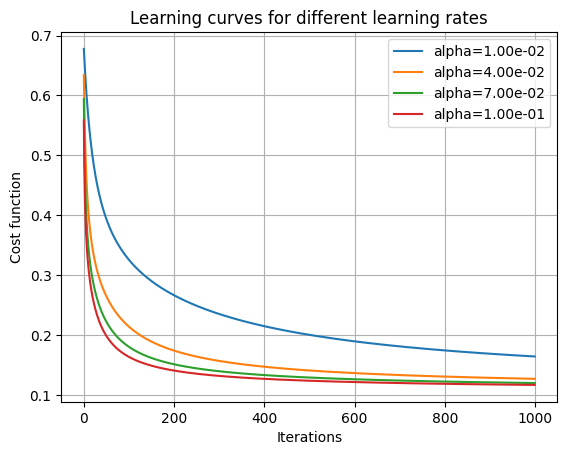

In [13]:
my_model = LogReg() # Create the model.
my_model.learning_curve(0.01, 0.1, X_train, y_train) # Look at learning curves to select learning rate.

In [14]:
my_model.train(X_train, y_train, 0.1) # Train the model.

(array([-0.54538707,  0.87961735, -0.0031404 ,  1.13208776,  1.28709567,
         0.14001789,  0.3459823 , -1.19025666, -0.9803897 , -1.47193274]),
 0.9613239726324033)

In [15]:
my_prediction = my_model.predict(X_test) # Make predictions.

# 3. Comparison to scikit-learn

In [16]:
sklearn_model = LogisticRegression() # Create model.
sklearn_model.fit(X_train, y_train) # Train the model
skklearn_prediction = sklearn_model.predict(X_test) # Make predictions.

LogisticRegression()

In [18]:
# Compute and compare accuracy scores.
my_accuracy = accuracy_score(y_test, my_prediction)
sklearn_accuracy = accuracy_score(y_test, skklearn_prediction)
print(f'The accuracy of the home-made model is:{my_accuracy:.2}')
print(f'The accuracy of the built-in scikit-learn model is:{sklearn_accuracy:.2}')

The accuracy of the home-made model is:0.97
The accuracy of the built-in scikit-learn model is:0.97
